In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re

from matplotlib import style
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
import os
import scipy as sc
# graphics
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
#Decision tree

In [2]:
df= pd.read_csv('live.csv', parse_dates =['end.time'])
list(df)
#df.isnull().sum()

['Unnamed: 0',
 'amt.pledged',
 'blurb',
 'by',
 'country',
 'currency',
 'end.time',
 'location',
 'percentage.funded',
 'state',
 'title',
 'type',
 'url']

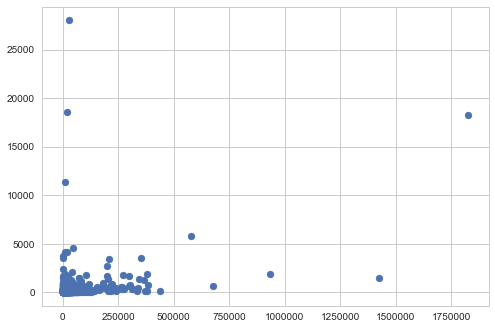

In [3]:
plt.scatter(df['amt.pledged'],df['percentage.funded'])


In [4]:
#df[df['percentage.funded'].gt(15000)]
df['end.time']

0      2016-11-02 03:59:00
1      2016-11-25 06:13:33
2      2016-11-24 04:00:00
3      2016-11-02 03:50:00
4      2016-11-19 04:05:48
5      2016-11-28 05:00:00
6      2016-11-20 16:57:34
7      2016-11-28 20:00:00
8      2016-11-10 00:27:32
9      2016-10-30 10:21:30
10     2016-11-23 04:30:00
11     2016-11-26 07:55:00
12     2016-11-16 05:00:46
13     2016-11-18 21:22:53
14     2016-11-03 00:00:00
15     2016-11-25 13:25:18
16     2016-11-10 15:03:09
17     2016-11-02 22:59:00
18     2016-12-01 03:00:00
19     2016-11-09 13:56:57
20     2016-12-10 01:00:00
21     2016-11-26 16:41:44
22     2016-11-28 03:18:49
23     2016-12-06 21:00:00
24     2016-11-04 02:00:00
25     2016-11-17 16:05:44
26     2016-11-04 03:00:00
27     2016-11-12 18:11:32
28     2016-11-02 13:58:00
29     2016-11-07 15:16:51
               ...        
3970   2016-11-23 12:01:25
3971   2016-11-30 18:30:00
3972   2016-11-03 22:23:35
3973   2016-11-22 15:58:21
3974   2016-12-27 21:56:00
3975   2016-11-17 02:00:00
3

In [5]:
df.goal = (df["amt.pledged"]/df["percentage.funded"])*100


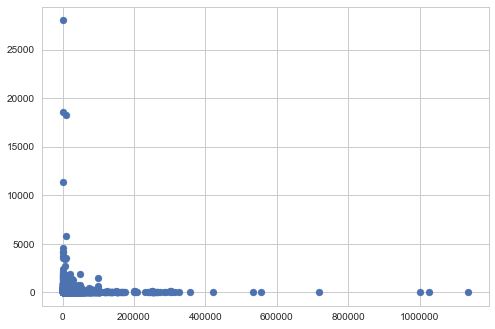

In [6]:
plt.scatter(df.goal, df["percentage.funded"])

In [7]:
df2= pd.read_csv ('most_backed.csv')
list(df2)


['Unnamed: 0',
 'amt.pledged',
 'blurb',
 'by',
 'category',
 'currency',
 'goal',
 'location',
 'num.backers',
 'num.backers.tier',
 'pledge.tier',
 'title',
 'url']

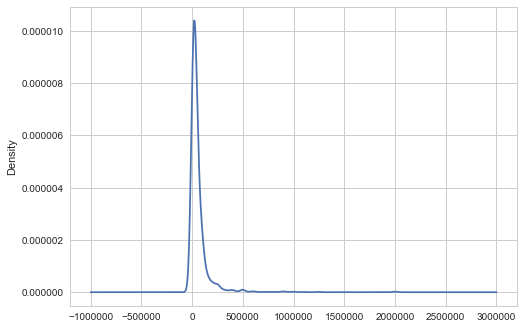

In [8]:
df2["goal"].plot(kind = 'density')
#plt.scatter(df2.goal.values,df2.goal)

In [9]:
df2['goal'].min()

1.0

In [10]:
#average word count and word length blurb
df.blurb_wc = df.blurb.str.split().apply(len)
df.blurb_alpw = df.blurb.str.len()/df.blurb.str.count(" ")

df2.blurb_wc = df2.blurb.str.split().apply(len)
df2.blurb_alpw = df2.blurb.str.len()/df2.blurb.str.count(" ")



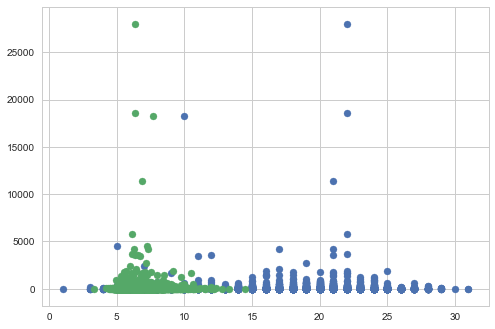

In [11]:
plt.scatter(df.blurb_wc,df['percentage.funded'])
plt.scatter(df.blurb_alpw,df['percentage.funded'])

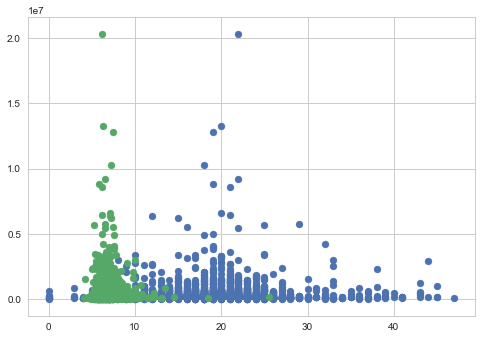

In [12]:
plt.scatter(df2.blurb_wc,df2['amt.pledged'])
plt.scatter(df2.blurb_alpw,df2['amt.pledged'])


LIVE.CSV
Time to identify the projects that reached their goal ~time
last update of the dataset was 29-10-2016

https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties

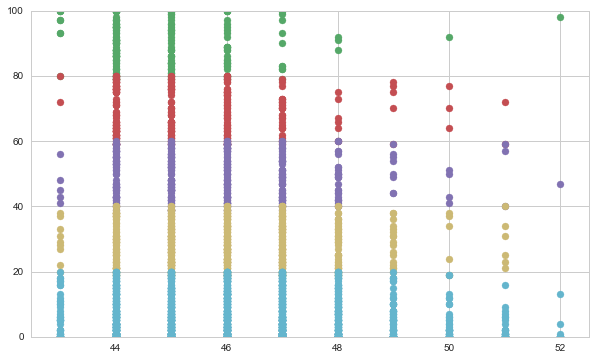

In [61]:
m100 = df[df['percentage.funded']>100]
m80 = df[df['percentage.funded'].between(79,100)]
m60 = df[df['percentage.funded'].between(59,80)]
m40 = df[df['percentage.funded'].between(39,60)]
m20 = df[df['percentage.funded'].between(19,40)]
m00 = df[df['percentage.funded'].between(0,20)]

mlist = [m100,m80, m60, m40, m20, m00]
plt.figure(figsize=(10,6))
plt.ylim((0,100))

for ds in range(0,len(mlist)):
            plt.scatter(mlist[ds]['end.time'].dt.week, mlist[ds]['percentage.funded'])
            

1. Select fail projects: week 43 < 60%, week 44 < 35%, week 45 < 10%
2. check densities df2 vs fail ~ blurb characteristics

In [73]:
aa = df['end.time'].dt.week == 43
ab = df['percentage.funded'].between(0,60)

ba = df['end.time'].dt.week == 44
bb = df['percentage.funded'].between(0,35)

ca = df['end.time'].dt.week == 45
cb = df['percentage.funded'].between(0,10)
fail = pd.concat([df[(aa) & (ab)],df[(ba) & (bb)],df[(ca) & (cb)]])


In [135]:
#create features word_count / average word length / length blurb
fail['word_count'] = fail.blurb.str.split().apply(len)
fail['av_len_word'] = fail.blurb.str.len()/(fail.blurb.str.count(" ") + 1)
fail['len_blurb'] = fail.blurb.str.len()

df2['word_count'] = df2.blurb.str.split().apply(len)
df2['av_len_word'] = df2.blurb.str.len()/(df2.blurb.str.count(" ") + 1)
df2['len_blurb'] = df2.blurb.str.len()

fail['av_len_word'] = fail['av_len_word'].astype('int64')
df2['av_len_word'] = df2['av_len_word'].astype('int64')




C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


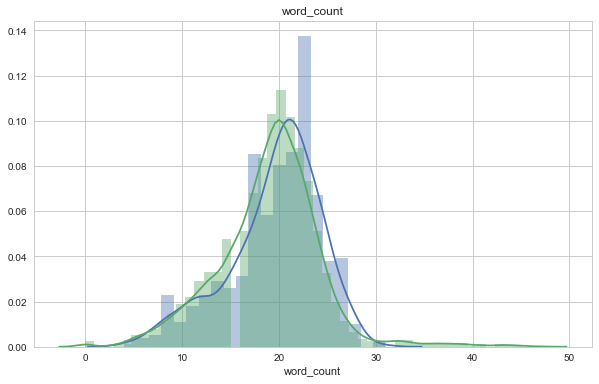

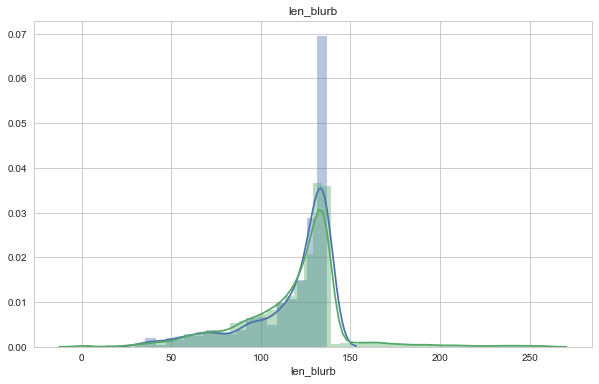

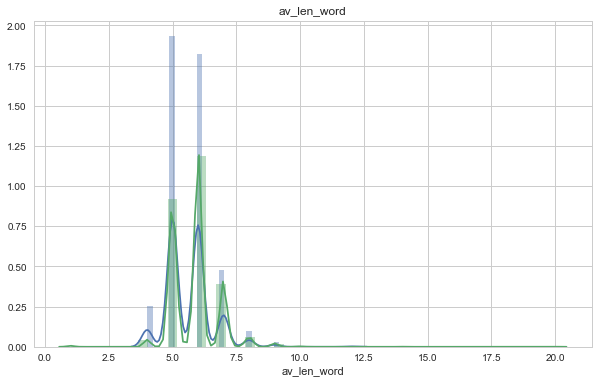

In [137]:
blurb_features = ['word_count','len_blurb','av_len_word']
for i in range(0,len(blurb_features)):
    plt.figure(figsize=(10,6))
    plt.title(blurb_features[i])
    sns.distplot(fail[blurb_features[i]])
    sns.distplot(df2[blurb_features[i]])



Random code

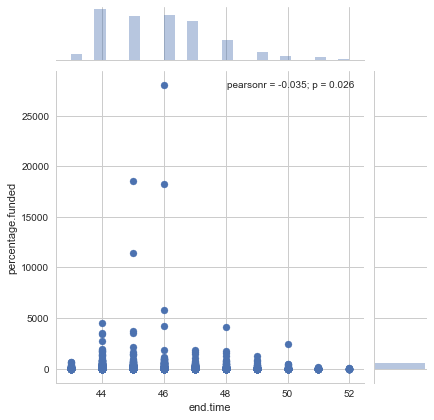

In [13]:

#df['end.time'].dt.week.iloc[0]
#weekjes = df['end.time'].dt.week
#sns.jointplot(weekjes, df['percentage.funded'])


#df['100plus']=df['end.time'].where(df['percentage.funded'] > 100)
#print(df['binnen'].value_counts())
#df.iloc[1].(df['percentage.funded'] > 100).value_counts()
#plt.figure(figsize=(10,6))
#plt.plot(df['end.time'], df['binnen'])
#print(df['binnen'])